# 1.1. Introduction to fraud detection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
FILEPATH='/home/anonymous/Documents/github/data-science/pandas'

if FILEPATH not in sys.path:
    sys.path.append(FILEPATH)

import pandas_common

In [2]:
sys.path

['/home/anonymous/anaconda3/lib/python36.zip',
 '/home/anonymous/anaconda3/lib/python3.6',
 '/home/anonymous/anaconda3/lib/python3.6/lib-dynload',
 '',
 '/home/anonymous/.local/lib/python3.6/site-packages',
 '/home/anonymous/anaconda3/lib/python3.6/site-packages',
 '/home/anonymous/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/anonymous/.ipython',
 '/home/anonymous/Documents/github/data-science/pandas']

In [3]:
pandas_common.config_pandas_display()
pd.set_option('display.max_colwidth', 500)

In [4]:
def printListItemLength(List):
    for item in List:
        print(len(item))

In [5]:
df = pd.read_csv('data/chapter_1/creditcard_sampledata.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 31 columns):
Time      8000 non-null int64
V1        8000 non-null float64
V2        8000 non-null float64
V3        8000 non-null float64
V4        8000 non-null float64
V5        8000 non-null float64
V6        8000 non-null float64
V7        8000 non-null float64
V8        8000 non-null float64
V9        8000 non-null float64
V10       8000 non-null float64
V11       8000 non-null float64
V12       8000 non-null float64
V13       8000 non-null float64
V14       8000 non-null float64
V15       8000 non-null float64
V16       8000 non-null float64
V17       8000 non-null float64
V18       8000 non-null float64
V19       8000 non-null float64
V20       8000 non-null float64
V21       8000 non-null float64
V22       8000 non-null float64
V23       8000 non-null float64
V24       8000 non-null float64
V25       8000 non-null float64
V26       8000 non-null float64
V27       8000 non-null float64

In [6]:
df.shape

(8000, 31)

In [7]:
df1_2 = pd.read_csv('data/chapter_1/creditcard_sampledata_3.csv', index_col=0)
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5050 entries, 258647 to 63421
Data columns (total 30 columns):
V1        5050 non-null float64
V2        5050 non-null float64
V3        5050 non-null float64
V4        5050 non-null float64
V5        5050 non-null float64
V6        5050 non-null float64
V7        5050 non-null float64
V8        5050 non-null float64
V9        5050 non-null float64
V10       5050 non-null float64
V11       5050 non-null float64
V12       5050 non-null float64
V13       5050 non-null float64
V14       5050 non-null float64
V15       5050 non-null float64
V16       5050 non-null float64
V17       5050 non-null float64
V18       5050 non-null float64
V19       5050 non-null float64
V20       5050 non-null float64
V21       5050 non-null float64
V22       5050 non-null float64
V23       5050 non-null float64
V24       5050 non-null float64
V25       5050 non-null float64
V26       5050 non-null float64
V27       5050 non-null float64
V28       5050 non-null

In [8]:
df1_2.shape

(5050, 30)

In [9]:
df1_2.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,1.618952,-0.654046,-1.442665,-1.546538,-0.230008,1.785539,1.419793,0.071666,0.233031,0.275911,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,1.521570,0.499202,-0.127849,-0.237253,-0.752351,0.667190,0.724785,-1.736615,0.702088,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0


In [10]:
df1_2.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,-0.056943,0.035342,-0.052371,0.003131,-0.063824,-0.027567,-0.044949,-0.070704,-0.037026,-0.007536,-0.000940,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,1.278092,1.105792,1.259155,0.994961,1.190900,0.905586,1.031225,1.234009,0.894977,0.827070,0.715765,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,-17.141514,-3.469084,-18.683715,-3.539561,-15.297656,-3.875765,-14.129855,-21.338195,-8.484449,-4.038451,-13.421949,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,-0.541561,-0.752762,-0.438689,-0.639214,-0.462520,-0.601438,-0.490668,-0.490088,-0.508041,-0.471003,-0.212240,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,-0.109888,-0.032953,0.144052,-0.019056,0.032090,0.013126,0.064560,-0.077191,-0.021247,-0.004843,-0.062039,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,0.437051,0.759681,0.623239,0.683348,0.466251,0.607702,0.516420,0.389950,0.469353,0.458362,0.124908,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,12.562347,9.939820,4.846452,3.579906,6.634483,3.363685,3.620831,6.024397,3.531250,4.851255,10.150611,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


In [11]:
df1_2['Class'].value_counts()

0    5000
1      50
Name: Class, dtype: int64

# 1.1. Increasing successful detections using data sampling

In [12]:
from imblearn.over_sampling import RandomOverSampler

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [13]:
labels = df1_2.columns[:-1]
labels

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [14]:
X = df1_2[labels]
X.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,1.618952,-0.654046,-1.442665,-1.546538,-0.230008,1.785539,1.419793,0.071666,0.233031,0.275911,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00
69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,1.521570,0.499202,-0.127849,-0.237253,-0.752351,0.667190,0.724785,-1.736615,0.702088,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17


In [15]:
y = df1_2['Class']
y.head(2)

258647    0
69263     0
Name: Class, dtype: int64

In [16]:
method = RandomOverSampler()
X_resampled, y_resampled = method.fit_sample(X, y)
print('X_resampled:', X_resampled[:2])
print('y_resampled:', y_resampled[:2])

X_resampled: [[ 1.72526466e+00 -1.33725592e+00 -1.01268723e+00 -3.61656463e-01
  -1.43161112e+00 -1.09868097e+00 -8.42273887e-01 -2.65944111e-02
  -3.24086916e-02  2.15113318e-01  1.61895151e+00 -6.54046265e-01
  -1.44266462e+00 -1.54653811e+00 -2.30008313e-01  1.78553942e+00
   1.41979301e+00  7.16655170e-02  2.33031136e-01  2.75911462e-01
   4.14523549e-01  7.93433622e-01  2.88866295e-02  4.19420877e-01
  -3.67528630e-01 -1.55634495e-01 -1.57676763e-02  1.07902703e-02
   1.89000000e+02]
 [ 6.83253845e-01 -1.68187486e+00  5.33349336e-01 -3.26064341e-01
  -1.45560260e+00  1.01831722e-01 -5.20590367e-01  1.14036026e-01
  -6.01759617e-01  4.44011205e-01  1.52157013e+00  4.99202119e-01
  -1.27848981e-01 -2.37253049e-01 -7.52351221e-01  6.67190352e-01
   7.24785310e-01 -1.73661453e+00  7.02087839e-01  6.38185555e-01
   1.16897942e-01 -3.04605373e-01 -1.25546963e-01  2.44847768e-01
   6.91630813e-02 -4.60711621e-01 -1.70682293e-02  6.35420640e-02
   3.15170000e+02]]
y_resampled: [0 0]


In [17]:
# compare_plots(X_resampled, y_resampled, X, y)

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
'''Define resampling method'''
method = SMOTE(kind='borderline1')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

printListItemLength([X_train, X_test, y_train, y_test])

4040
1010
4040
1010


In [20]:
'''Apply resampling to training data only'''
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

printListItemLength([X_resampled, y_resampled])

7992
7992


In [21]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
model

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       0.75      1.00      0.86         6

    accuracy                           1.00      1010
   macro avg       0.88      1.00      0.93      1010
weighted avg       1.00      1.00      1.00      1010



# 1.2. Fraud detection algorithms in action

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
'''Split features & labels'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

printListItemLength([X_train, X_test, y_train, y_test])

4040
1010
4040
1010


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predicted = model.predict(X_test)
predicted

array([-0.00057326, -0.0023998 , -0.00051398, ...,  0.00101095,
        0.02758604, -0.00390853])

In [27]:
print(metrics.r2_score(y_test, predicted))

0.5199697167464297


# 2. Review of classification methods for fraud detection

In [28]:
df2_1 = pd.read_csv('data/chapter_2/creditcard_sampledata_2.csv', index_col=0)
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7300 entries, 221547 to 145800
Data columns (total 30 columns):
V1        7300 non-null float64
V2        7300 non-null float64
V3        7300 non-null float64
V4        7300 non-null float64
V5        7300 non-null float64
V6        7300 non-null float64
V7        7300 non-null float64
V8        7300 non-null float64
V9        7300 non-null float64
V10       7300 non-null float64
V11       7300 non-null float64
V12       7300 non-null float64
V13       7300 non-null float64
V14       7300 non-null float64
V15       7300 non-null float64
V16       7300 non-null float64
V17       7300 non-null float64
V18       7300 non-null float64
V19       7300 non-null float64
V20       7300 non-null float64
V21       7300 non-null float64
V22       7300 non-null float64
V23       7300 non-null float64
V24       7300 non-null float64
V25       7300 non-null float64
V26       7300 non-null float64
V27       7300 non-null float64
V28       7300 non-nul

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier(random_state=42)
labels = df2_1.columns[:-1]
X = df2_1[labels]
y = df2_1['Class']

In [31]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.996039603960396


/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
probs = model.predict_proba(X_test)
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# 2.1. Measuring fraud detection performance

In [33]:
average_precision = metrics.average_precision_score(y_test, predicted)
average_precision

0.6494349434943494

In [34]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, predicted)
precision, recall, threshold

(array([0.01089109, 0.88888889, 1.        ]),
 array([1.        , 0.72727273, 0.        ]),
 array([0, 1]))

In [35]:
'''Calculate F1 score'''
f1 = metrics.f1_score(y_test, predicted)
f1

0.7999999999999999

In [36]:
'''Calculate precision-recall AUC'''
auc = metrics.auc(recall, precision)
auc

0.8095659565956596

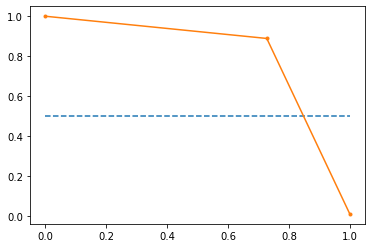

In [37]:
plt.plot([0,1], [0.5,0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [38]:
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.9075439075439076


In [39]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       0.89      0.73      0.80        11

    accuracy                           1.00      1010
   macro avg       0.94      0.86      0.90      1010
weighted avg       1.00      1.00      1.00      1010



In [40]:
print(confusion_matrix(y_test, predicted))

[[998   1]
 [  3   8]]


# 2.2. Adjusting your algorithms for fraud detection

In [41]:
from sklearn.svm import SVC

In [42]:
'''Balanced weight'''

model = RandomForestClassifier(class_weight='balanced')
model = RandomForestClassifier(class_weight='balanced_subsample')
model = LogisticRegression(class_weight='balanced')
model = SVC(kernel='linear', class_weight='balanced', probability=True)

In [43]:
'''Hyperparameter tuning for fraud detection'''

model = RandomForestClassifier(class_weight={0:1,1:4}, random_state=1)
model = LogisticRegression(class_weight={0:1,1:4}, random_state=1)

model = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                               min_samples_split=2,min_samples_leaf=1, 
                               max_features='auto', n_jobs=-1, class_weight=None)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [46]:
model = RandomForestClassifier()

In [47]:
%%time
grid_search_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search_model.fit(X_train, y_train)

CPU times: user 8.73 s, sys: 411 ms, total: 9.14 s
Wall time: 7min 15s


In [48]:
'''Get the optimal parameters'''
grid_search_model.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [49]:
'''Get the best estimator results'''
grid_search_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
grid_search_model.best_score_

0.8894743045733144

# 2.3. Using ensemble methods to improve fraud detection

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [52]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

In [53]:
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [54]:
ensemble_model.fit(X_train, y_train)
ensemble_model.predict(X_test)

/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anonymous/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 0, 0, ..., 0, 0, 0])

In [55]:
VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2,1,1])

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                              

# 3. Normal versus abnormal behaviour

In [56]:
df3_1 = pd.read_csv('data/chapter_3/banksim_adj.csv', index_col=0)
df3_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7189 entries, 0 to 7199
Data columns (total 18 columns):
age                      7189 non-null int64
amount                   7189 non-null float64
fraud                    7189 non-null int64
M                        7189 non-null int64
es_barsandrestaurants    7189 non-null int64
es_contents              7189 non-null int64
es_fashion               7189 non-null int64
es_food                  7189 non-null int64
es_health                7189 non-null int64
es_home                  7189 non-null int64
es_hotelservices         7189 non-null int64
es_hyper                 7189 non-null int64
es_leisure               7189 non-null int64
es_otherservices         7189 non-null int64
es_sportsandtoys         7189 non-null int64
es_tech                  7189 non-null int64
es_transportation        7189 non-null int64
es_travel                7189 non-null int64
dtypes: float64(1), int64(17)
memory usage: 1.0 MB


In [57]:
df3_2 = pd.read_csv('data/chapter_3/banksim.csv', index_col=0)
df3_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 171915 to 579286
Data columns (total 5 columns):
age         7200 non-null object
gender      7200 non-null object
category    7200 non-null object
amount      7200 non-null float64
fraud       7200 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 337.5+ KB


In [58]:
df3_3 = pd.read_pickle('data/chapter_3/db_full.pickle')
df3_3

DBSCAN(algorithm='auto', eps=0.9, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=-1, p=None)

In [59]:
df3_4 = pd.read_pickle('data/chapter_3/labels_full.pickle')
df3_4[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: fraud, dtype: int64

In [60]:
df3_4.value_counts()

0    6989
1     200
Name: fraud, dtype: int64

In [61]:
df3_5 = pd.read_pickle('data/chapter_3/labels.pickle')
df3_5[:10]

4656    0
3579    0
3474    0
1501    0
6221    0
6407    0
3823    0
471     0
705     0
3670    0
Name: fraud, dtype: int64

In [62]:
df3_5.value_counts()

0    3000
1     100
Name: fraud, dtype: int64

In [65]:
df3_6 = pd.read_pickle('data/chapter_3/x_scaled.pickle')
df3_6[0]

array([0.83333333, 0.01910336, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        ])

In [66]:
def npValueCounts(Array):
    '''
    Return numpy array value counts as a pandas dataframe
    
    Parameters
    ----------
    Array: np.array
    
    Result
    ------
    Pandas dataframe
    '''
    import numpy as np
    import pandas as pd
    
    unique, counts = np.unique(Array, return_counts=True)
    unique_counts = {'value': list(unique), 'count': list(counts)}
    df = pd.DataFrame.from_dict(unique_counts)
    return df

In [67]:
npValueCounts(df3_6).sort_values('count', ascending=False).head()

,value,count
0,0.000000,42152
2418,1.000000,4621
2266,0.333333,1015
2345,0.500000,733
2380,0.666667,568


In [68]:
df3_7 = pd.read_pickle('data/chapter_3/x_scawed_full.pickle')
df3_7[0]

array([0.5       , 0.20681002, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        ])

In [69]:
npValueCounts(df3_7).sort_values('count', ascending=False).head()

,value,count
0,0.000000,97814
4389,1.000000,10660
4043,0.333333,2333
4218,0.500000,1718
4311,0.666667,1279


In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## KMeans

In [71]:
X = np.array(df2_1).astype(np.float)
X

array([[-1.19166848e+00,  4.28408570e-01,  1.64002800e+00, ...,
        -1.74444289e-02,  2.74400000e+01,  0.00000000e+00],
       [ 1.96661435e+00, -4.50086974e-01, -1.22858598e+00, ...,
        -7.13139301e-02,  3.59500000e+01,  0.00000000e+00],
       [ 1.52845161e+00, -1.29619125e+00, -8.90676942e-01, ...,
         2.58531705e-02,  2.84000000e+01,  0.00000000e+00],
       ...,
       [-3.61427839e-01,  1.13347192e+00, -2.97136044e+00, ...,
        -1.82750897e-01,  4.80720000e+02,  1.00000000e+00],
       [-1.14155894e+00,  1.92765004e+00, -3.90535615e+00, ...,
         7.62114891e-02,  2.50000000e+01,  1.00000000e+00],
       [-4.19820174e-01, -1.15597801e+00, -2.09251550e+00, ...,
         1.29096386e-01,  4.51270000e+02,  1.00000000e+00]])

In [72]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_scaled)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Right amount of clusters

In [73]:
clust = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in clust]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
score

[-1319.2623146279884,
 -871.8713924662665,
 -793.9142667605355,
 -716.0272968299423,
 -677.0290872392054,
 -648.3118453906632,
 -625.8925978268425,
 -605.7337776364698,
 -590.1229051372973]

## Elbow curve
https://en.wikipedia.org/wiki/Elbow_method_(clustering)

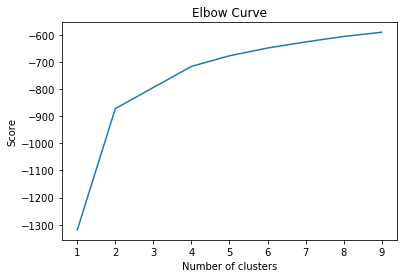

In [74]:
plt.plot(clust, score)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# 3.1. Assigning fraud versus non-fraud cases

In [75]:
'''Run KMeans model on scaled data'''
kmeans = KMeans(n_clusters=6, random_state=42, n_jobs=-1).fit(X_scaled)

'''Get the cluster number for each datapoint'''
X_clusters = kmeans.predict(X_scaled)

'''Save the cluster centroids'''
X_clusters_centers = kmeans.cluster_centers_

X_clusters_centers

array([[9.30326930e-01, 6.58013592e-01, 8.91470119e-01, 2.98407174e-01,
        6.92995753e-01, 2.82662755e-01, 6.24293301e-01, 6.71913254e-01,
        6.21410867e-01, 6.57172707e-01, 2.13714726e-01, 8.21587445e-01,
        6.40461703e-01, 7.51479815e-01, 4.61797435e-01, 7.47403860e-01,
        7.90010560e-01, 7.15702852e-01, 4.11181295e-01, 4.15243600e-01,
        4.55688047e-01, 5.15915167e-01, 5.70856861e-01, 4.42200154e-01,
        5.55857570e-01, 3.07185390e-01, 5.91225691e-01, 2.06097679e-01,
        6.38904901e-03, 8.32667268e-16],
       [5.93629587e-01, 7.76159313e-01, 4.66089637e-01, 7.38119523e-01,
        4.69359978e-01, 1.99511101e-01, 4.29328142e-01, 7.32125494e-01,
        3.65008859e-01, 3.42534520e-01, 6.42077015e-01, 2.93650009e-01,
        5.69009804e-01, 3.36421711e-01, 5.23892602e-01, 2.65218646e-01,
        2.89380840e-01, 2.61405305e-01, 6.22649766e-01, 4.33037091e-01,
        4.63099879e-01, 5.40090616e-01, 5.70164465e-01, 4.56836705e-01,
        5.63387771e-01,

In [76]:
'''Calculate the distance to the cluster centroid for each point'''
dist = [np.linalg.norm(x-y) for x,y in zip(X_scaled, X_clusters_centers[X_clusters])]

dist[:10]

[0.31791654367137306,
 0.1967040711444739,
 0.28072073181670354,
 0.21838338765292928,
 0.42462893827920384,
 0.25127538063448873,
 0.18103219252833663,
 0.37287074790805236,
 0.21988456413718224,
 0.17842344034158075]

In [77]:
'''Create predictions based on distance'''
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 93)] = 1
km_y_pred[dist < np.percentile(dist, 93)] = 0

km_y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [78]:
npValueCounts(km_y_pred)

,value,count
0,0.0,6789
1,1.0,511


# 3.2. Other clustering fraud detection methods

In [79]:
from sklearn.cluster import DBSCAN

In [80]:
db = DBSCAN(eps=0.5, min_samples=10, n_jobs=-1).fit(X_scaled)
db

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=-1, p=None)

In [81]:
'''Get the cluster labels'''
pred_labels = db.labels_
pred_labels

array([0, 0, 0, ..., 1, 1, 1])

In [82]:
npValueCounts(pred_labels)

,value,count
0,-1,37
1,0,6983
2,1,223
3,2,12
4,3,45


In [83]:
'''Count the total number of clusters'''
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
n_clusters_

4

In [84]:
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 4


In [85]:
print('Silhouette coefficient: %0.3f' % metrics.silhouette_score(X_scaled, pred_labels))

Silhouette coefficient: 0.645


# 4. Using text data to detect fraud

In [88]:
df4_1 = pd.read_pickle('data/chapter_4/corpus.pickle')
print(type(df4_1))
print(len(df4_1))
df4_1[0]

<class 'list'>
200


[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 5),
 (11, 2),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 4),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 3),
 (32, 4),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 3),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 3),
 (41, 2),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 4),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 2),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 3),
 (58, 1),
 (59, 1),
 (60, 2),
 (61, 1),
 (62, 2),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 3),
 (68, 7),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 2),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 3),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 2),
 (91, 2),
 (92, 2),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [89]:
df4_2 = pd.read_pickle('data/chapter_4/dict.pickle')
print(type(df4_2))
print(len(df4_2))
df4_2[0]

<class 'gensim.corpora.dictionary.Dictionary'>
8948


'affiliated'

In [90]:
df4_3 = pd.read_csv('data/chapter_4/enron_emails_clean.csv')
df4_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 6 columns):
Message-ID       2090 non-null object
From             2090 non-null object
To               2090 non-null object
Date             2090 non-null object
content          2090 non-null object
clean_content    2086 non-null object
dtypes: object(6)
memory usage: 98.0+ KB


In [91]:
df4_3.head(1)

,Message-ID,From,To,Date,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,"INVESTools Advisory\nA Free Digest of Trusted Investment Advice\n\nTo unsubscribe from this free newsletter, please see below.\n\nIn This Issue:\n\n1. Fried Sells 4 Stocks, Gains +46.8% in 3 Months (KM)\n2. Rowe: January Index Confirms Bull Market for 2002 (ALOY)\n3. Small-Cap Advisor Earns +31.6% in 2001 (LBIX)\n4. Compounding Returns with Pine Trees (PCL)\n5. Undervalued, High-yield Bank Puts Customers First (ASO)\n\n\n*************** A Word from our Sponsor *******************\nTop Wall S...",investools advisory free digest trusted investment advice unsubscribe free newsletter please see issue fried sells stocks gains months km rowe january index confirms bull market aloy small cap advisor earns lbix compounding returns pine trees pcl undervalued high yield bank puts customers first aso word sponsor top wall street watcher ben zacks year year gain moving best brightest wall street big money machines earned ben zacks five year average annual gain start outperforming long term get ...


In [92]:
df4_3['content'].str.contains('money laundering').value_counts()

False    2090
Name: content, dtype: int64

In [93]:
df4_3['content'].str.contains('money').value_counts()

False    1866
True      224
Name: content, dtype: int64

In [94]:
df4_3['content'].str.contains('launder').value_counts()

False    2088
True        2
Name: content, dtype: int64

In [95]:
df4_3.loc[df4_3['content'].str.contains('launder', na=False)].count()

Message-ID       2
From             2
To               2
Date             2
content          2
clean_content    2
dtype: int64

In [96]:
list_of_words = ['police', 'launder']
df4_3['content'].str.contains('|'.join(list_of_words), na=False).value_counts()

False    2081
True        9
Name: content, dtype: int64

# 4.1. Text mining techniques for fraud detection

In [98]:
import nltk
from nltk import word_tokenize
import re

In [99]:
%%time

'''Tokenization'''
# text = df4_3.apply(lambda row: word_tokenize(row['content']), axis=1)
# text = text.str.rstrip()
# text = re.sub(r'[^a-zA-Z]', ' ', text)

df4_3['text'] = df4_3['content'].str.rstrip()
df4_3['text'] = df4_3['text'].str.replace(r'[^a-zA-Z]', ' ')
df4_3['text'] = df4_3.apply(lambda row: word_tokenize(row['text']), axis=1)
text = df4_3['text']

CPU times: user 4.73 s, sys: 33.8 ms, total: 4.77 s
Wall time: 4.77 s


In [100]:
df4_3.head(1)

,Message-ID,From,To,Date,content,clean_content,text
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,"INVESTools Advisory\nA Free Digest of Trusted Investment Advice\n\nTo unsubscribe from this free newsletter, please see below.\n\nIn This Issue:\n\n1. Fried Sells 4 Stocks, Gains +46.8% in 3 Months (KM)\n2. Rowe: January Index Confirms Bull Market for 2002 (ALOY)\n3. Small-Cap Advisor Earns +31.6% in 2001 (LBIX)\n4. Compounding Returns with Pine Trees (PCL)\n5. Undervalued, High-yield Bank Puts Customers First (ASO)\n\n\n*************** A Word from our Sponsor *******************\nTop Wall S...",investools advisory free digest trusted investment advice unsubscribe free newsletter please see issue fried sells stocks gains months km rowe january index confirms bull market aloy small cap advisor earns lbix compounding returns pine trees pcl undervalued high yield bank puts customers first aso word sponsor top wall street watcher ben zacks year year gain moving best brightest wall street big money machines earned ben zacks five year average annual gain start outperforming long term get ...,"[INVESTools, Advisory, A, Free, Digest, of, Trusted, Investment, Advice, To, unsubscribe, from, this, free, newsletter, please, see, below, In, This, Issue, Fried, Sells, Stocks, Gains, in, Months, KM, Rowe, January, Index, Confirms, Bull, Market, for, ALOY, Small, Cap, Advisor, Earns, in, LBIX, Compounding, Returns, with, Pine, Trees, PCL, Undervalued, High, yield, Bank, Puts, Customers, First, ASO, A, Word, from, our, Sponsor, Top, Wall, Street, Watcher, Ben, Zacks, year, Year, Gain, Movin..."


In [101]:
from nltk.corpus import stopwords
import string

In [102]:
'''Remove all stopwords and punctuation'''
exclude = set(string.punctuation)
print(exclude)

{"'", '_', ';', '{', '>', ',', '}', '`', ':', ']', '-', '!', '%', '[', '\\', '?', '/', '&', '+', '~', '(', '|', '*', '#', '@', '.', '<', '"', '$', '^', ')', '='}


In [103]:
stop = set(stopwords.words('english'))
print(stop)

{'couldn', 'from', 'the', "you'd", 'such', 'has', 'yours', 'with', 'same', 'they', 'myself', 'have', 'doesn', 'it', 'under', 'haven', "it's", 'while', 'm', 'we', 'hasn', 'when', 'am', 'both', 'most', "won't", "hasn't", 'other', 'being', 'doing', 'above', 'o', 'about', 'ourselves', "shouldn't", 'shouldn', 'having', 's', 'was', 'wouldn', 'hers', 'so', 'herself', 'very', 'she', 'he', 'a', 'can', 'shan', 'down', 'whom', 'again', 'these', 'does', "mightn't", 'before', 'himself', 'by', 'not', "don't", 'further', 'nor', 'at', 'than', 'yourself', 'over', 'where', 'which', 'wasn', 'that', 'as', 'i', 're', 'did', 'just', "weren't", 'my', 'do', 'd', 'their', 'had', 'once', 'but', 'our', 'there', 'why', 'won', "should've", 'aren', "shan't", 've', 'ain', 'to', 'what', 'ma', 'only', 'and', 'his', 'during', "you'll", 'll', "she's", 'an', 'hadn', "you're", 'isn', 'weren', 'some', 'all', 'or', 'few', 'don', "aren't", 'should', 'mightn', 'theirs', 'its', 'themselves', "wouldn't", 't', 'more', 'itself', 

In [106]:
len(text)

2090

In [108]:
stop_free = ' '.join([word for word in lis for lis in text if ((word not in stop) and (not word.isdigit()))])

# for lis in text:
#     for word in lis:
#         if (word not in stop) and (not word.isdigit()):
#             stop_free = ' '.join([word])

print(stop_free[:100])

Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded Forwarded 


In [109]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [110]:
'''Lemmatize words'''
lemma = WordNetLemmatizer()

'''Stem words'''
porter = PorterStemmer()

# 4.2. Topic modelling

In [111]:
import gensim
from gensim import corpora

In [112]:
df4_3.head(1)

,Message-ID,From,To,Date,content,clean_content,text
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,"INVESTools Advisory\nA Free Digest of Trusted Investment Advice\n\nTo unsubscribe from this free newsletter, please see below.\n\nIn This Issue:\n\n1. Fried Sells 4 Stocks, Gains +46.8% in 3 Months (KM)\n2. Rowe: January Index Confirms Bull Market for 2002 (ALOY)\n3. Small-Cap Advisor Earns +31.6% in 2001 (LBIX)\n4. Compounding Returns with Pine Trees (PCL)\n5. Undervalued, High-yield Bank Puts Customers First (ASO)\n\n\n*************** A Word from our Sponsor *******************\nTop Wall S...",investools advisory free digest trusted investment advice unsubscribe free newsletter please see issue fried sells stocks gains months km rowe january index confirms bull market aloy small cap advisor earns lbix compounding returns pine trees pcl undervalued high yield bank puts customers first aso word sponsor top wall street watcher ben zacks year year gain moving best brightest wall street big money machines earned ben zacks five year average annual gain start outperforming long term get ...,"[INVESTools, Advisory, A, Free, Digest, of, Trusted, Investment, Advice, To, unsubscribe, from, this, free, newsletter, please, see, below, In, This, Issue, Fried, Sells, Stocks, Gains, in, Months, KM, Rowe, January, Index, Confirms, Bull, Market, for, ALOY, Small, Cap, Advisor, Earns, in, LBIX, Compounding, Returns, with, Pine, Trees, PCL, Undervalued, High, yield, Bank, Puts, Customers, First, ASO, A, Word, from, our, Sponsor, Top, Wall, Street, Watcher, Ben, Zacks, year, Year, Gain, Movin..."


In [113]:
# Create dictionary number of times a word appears
dictionary = corpora.Dictionary(df4_3['text'])
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [114]:
# Filter out (non)frequent words
dictionary.filter_extremes(no_below=5, keep_n=50000)

In [115]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [116]:
take(10, dictionary.dfs.items())

[(3, 10),
 (0, 402),
 (41, 31),
 (63, 21),
 (2, 6),
 (539, 66),
 (255, 888),
 (254, 154),
 (371, 35),
 (411, 488)]

In [117]:
dictionary.num_docs

2090

In [118]:
dictionary.num_nnz

324309

In [119]:
dictionary.num_pos

724142

In [120]:
%%time

# Create corpus
corpus = [dictionary.doc2bow(text) for text in df4_3['text']]

CPU times: user 370 ms, sys: 4.08 ms, total: 374 ms
Wall time: 372 ms


In [121]:
len(corpus)

2090

## Latent Dirichlet Allocation (LDA) with gensim

In [122]:
'''Define the LDA model'''
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)

In [123]:
'''Print the 3 topics from the model with top words'''
topics = ldamodel.print_topics(num_words=4)

In [124]:
for topic in topics:
    print(topic)

(0, '0.035*"com" + 0.030*"http" + 0.023*"net" + 0.022*"IMAGE"')
(1, '0.021*"ECT" + 0.014*"Enron" + 0.014*"ENRON" + 0.013*"Subject"')
(2, '0.015*"s" + 0.015*"Enron" + 0.012*"com" + 0.009*"or"')


# 4.3. Flagging fraud based on topics

In [126]:
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            '''dominant topic'''
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_details_df = topic_details_df.append(pd.Series([topic_num, wp]))
    
    topic_details_df.columns = ['Dominant_Topic', '% Score']
    
    return topic_details_df

In [128]:
# contents = pd.DataFrame({'Original text': text_clean})